In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # Accuracy metrics
from sklearn.metrics import precision_score  # Precision metrics
from sklearn.metrics import recall_score  # Recall metrics
from sklearn.metrics import f1_score  # F1 metrics
from sklearn.metrics import confusion_matrix  # Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay  # Confusion matrix display
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import mean_absolute_error  # Mean absolute error
from sklearn.metrics import mean_squared_error  # Mean squared error
import numpy as np


In [2]:
# Reading File CSV
df = pd.read_csv('output.csv')


In [3]:
# Splitting Data into Class and Value
X = df.drop('class', axis=1)  # Class
y = df['class']  # Value


In [4]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1234)  # 1234


In [5]:
# Decision Tree Value
size = [1, 10, 100, 1000, 10000]


rf1
0.9930883538762816
0.9933315505910926
0.9932892429575442
0.9933044791418203
0.007142034327842414
0.007602810736090312
0.0871940980576685
rf10
0.9997696117958761
0.999778280965207
0.999778280965207
0.999778280965207
0.00023038820412394885
0.00023038820412394885
0.0151785442030502
rf100
1.0
1.0
1.0
1.0
0.0
0.0
0.0
rf1000
0.999884805897938
0.9998900615655234
0.9998882556710247
0.999889140185268
0.00011519410206197443
0.00011519410206197443
0.010732851534516558
rf10000
0.999884805897938
0.9998900615655234
0.9998882556710247
0.999889140185268
0.00011519410206197443
0.00011519410206197443
0.010732851534516558


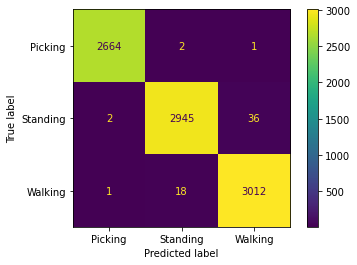

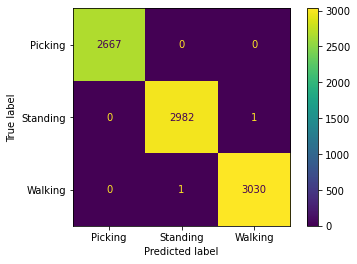

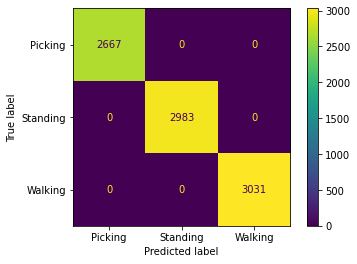

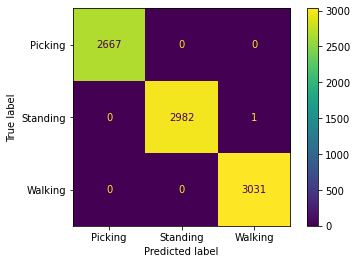

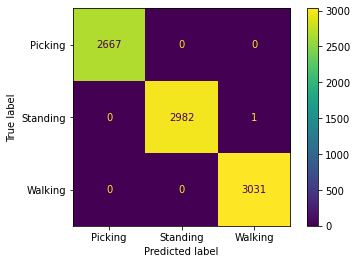

In [6]:
for i in size:

    # Pipeline for Decision Tree
    pipelines = {
        'rf' + str(i): make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=i, random_state=42))}

    # Training Pipeline
    fit_models = {}
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model
        for algo, model in fit_models.items():
            yhat = model.predict(X_test)

            # Change Class to New Value Picking [0], Standing [1], Walking [2]
            ytest = pd.factorize(y_test)[0]
            ypred = pd.factorize(yhat)[0]

            print(algo)

            # Confusion Matrix Display
            cm = confusion_matrix(y_test, yhat, labels=model.classes_)
            disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

            # Accuracy
            print(accuracy_score(y_test, yhat))

            # Precision
            print(precision_score(y_test, yhat, average='macro'))

            # Recall
            print(recall_score(y_test, yhat, average='macro'))

            # F1 Score
            print(f1_score(y_test, yhat, average='macro'))

            # Mean Absolute Error
            print(mean_absolute_error(ytest, ypred))

            # Mean Squared Error
            print(mean_squared_error(ytest, ypred))

            # Root Mean Squared Error
            print(np.sqrt(mean_squared_error(ytest, ypred)))
            disp.plot()
